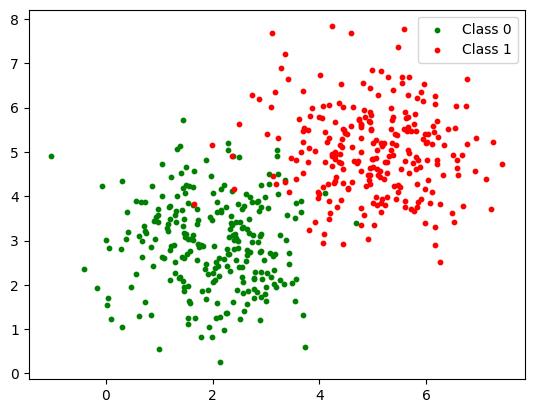

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


centers = [[2, 3], [5, 5]]
n_classes = len(centers)
n_samples = 512

data, labels = make_blobs(n_samples=n_samples, centers=centers, random_state=1337)

colors = ("green", "red", "blue")

fig, ax = plt.subplots()
for n_class in range(n_classes):
    ax.scatter(
        data[labels == n_class, 0],
        data[labels == n_class, 1],
        c=colors[n_class],
        s = 10,
        label=f"Class {n_class}",
    )

ax.legend(loc="upper right")

In [5]:
x0 = np.ones(n_samples)
X = np.stack((x0, data[:, 0], data[:, 1]), axis=1)
y = labels
y = np.where(y == 0, -1, y)
w = np.random.uniform(low=-1, high=1, size=3)


def sse(X, y, w):
    return np.sum((X @ w - y) ** 2)

In [7]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1337
)

perceptron = Perceptron(max_iter=500, tol=1e-3, eta0=0.01, random_state=1337)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

print(f"SKLearn Perceptron's Accuracy: {accuracy_score(y_test, y_pred)}")

SKLearn Perceptron's Accuracy: 0.912621359223301
